In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import numpy as np
from statsmodels.sandbox.regression.predstd import wls_prediction_std

In [2]:
df = pd.read_csv("data_27_06_merged.csv", sep='\t')

## Fit the dataframe to the right size

In [3]:
df = df.drop('Typ1', axis=1)

In [4]:
df = df.drop('Typ2', axis=1)

In [5]:
df = df.drop('Typ3', axis=1)

In [6]:
df = df.drop('Typ4', axis=1)

In [7]:
df = df.drop('Marke_und_Typ', axis=1)

In [8]:
df = df.drop('Ort', axis=1)

In [9]:
df = df.drop('Halterart', axis=1)

In [10]:
df.head()

,Marke,CO2,Erstinverkehrsetzung_Jahr,PLZ,Gemeindecode,Gemeindename,Einwohner
0,ABARTH,NaN,1957,6403,1331,Küssnacht (SZ),12.845
1,ABARTH,NaN,1969,3176,670,Neuenegg,5.543
2,ABARTH,NaN,1970,8152,66,Opfikon,19.978
3,ABARTH,NaN,2008,1117,5485,Grancy,403.000
4,ABARTH,155.0,2016,1261,5429,Longirod,469.000


## Drop all rows with empty values in the row CO2

In [11]:
df.describe()

,CO2,Erstinverkehrsetzung_Jahr,PLZ,Gemeindecode,Einwohner
count,4.172443e+06,4.560640e+06,4.560640e+06,4.560640e+06,4.544013e+06
mean,1.613363e+02,2.009665e+03,5.266760e+03,3.022696e+03,6.855644e+01
std,4.789712e+01,7.762216e+00,2.784204e+03,2.215730e+03,1.703820e+02
min,0.000000e+00,1.884000e+03,0.000000e+00,0.000000e+00,1.000000e+00
25%,1.290000e+02,2.006000e+03,2.740000e+03,8.790000e+02,3.873000e+00
50%,1.540000e+02,2.011000e+03,5.412000e+03,2.901000e+03,8.849000e+00
75%,1.850000e+02,2.015000e+03,8.154000e+03,5.146000e+03,2.451300e+01
max,9.990000e+02,2.019000e+03,7.826600e+04,7.301000e+03,9.990000e+02


In [12]:
df.shape

(4560640, 7)

In [13]:
df = df.dropna(subset=['CO2'])
df.head()

,Marke,CO2,Erstinverkehrsetzung_Jahr,PLZ,Gemeindecode,Gemeindename,Einwohner
4,ABARTH,155.0,2016,1261,5429,Longirod,469.000
6,ABARTH,145.0,2018,8585,4681,Langrickenbach,1.313
7,ABARTH,139.0,2016,8604,199,Volketswil,18.693
8,ABARTH,139.0,2016,7000,3901,Chur,35.038
23,AC,151.0,1955,4054,2701,Basel,171.513


In [14]:
df.shape

(4172443, 7)

## Top ten municipalities - according to the absolute values 

In [15]:
df.groupby('Gemeindename').CO2.sum().sort_values(ascending=False).head(10)

Gemeindename
Zürich        18971048.0
Genève        10752172.0
Basel          8353441.0
Bern           7445588.0
Lausanne       7251272.0
Winterthur     6254359.0
Lugano         5600264.0
St. Gallen     4859765.0
Luzern         4778672.0
Bellinzona     3693424.0
Name: CO2, dtype: float64

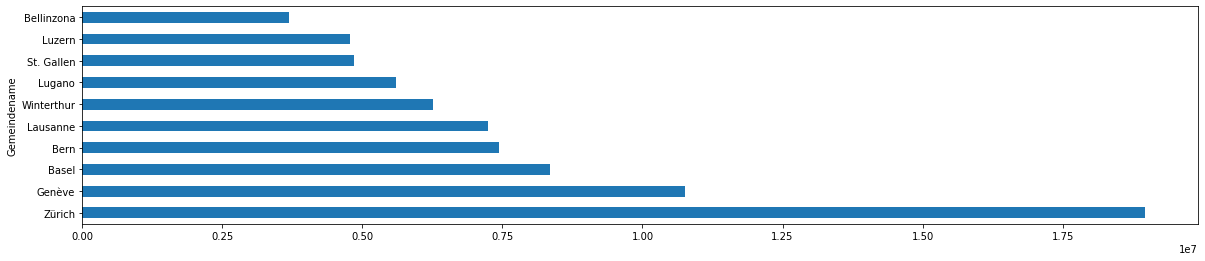

In [16]:
df.groupby('Gemeindename').CO2.sum().sort_values(ascending=False).head(10).plot(kind='barh', figsize=(20, 4))

## Alle the cars

In [17]:
# df.groupby('Gemeindename').CO2.sum().sort_values(ascending=False).head(300).plot(kind='barh', figsize=(20, 50))

## carbon dioxid emission per local community per car (example for zürich)

In [18]:
zürich = df[df.Gemeindename == 'Zürich'].head(1)

len_zh = len(zürich)
CO2_NaN_zh = zürich.CO2.isna().sum()

len_CO2_zh = len_zh - CO2_NaN_zh

tot_CO2_zh = zürich.CO2.sum()

CO2_per_car = (tot_CO2_zh / len_CO2_zh)

CO2_per_car

zürich

,Marke,CO2,Erstinverkehrsetzung_Jahr,PLZ,Gemeindecode,Gemeindename,Einwohner
5273,ALFA ROMEO,227.0,1997,8004,261,Zürich,409.241


## Make a function for every local community (CO2 per car)

In [19]:
communities = list(df.Gemeindename.value_counts().index)

In [24]:
import numpy as np

In [26]:
pd.set_option("display.max_rows",200)

## dies gibt den Schnitt pro Auto in jeder Gemeinde (C02 pro Kilometer)

In [31]:
com_avg = df.groupby("Gemeindename").CO2.agg(np.mean)


Gemeindename
Aadorf       164.176398
Aarau        162.064814
Aarberg      156.200404
Aarburg      159.324584
Aarwangen    159.082192
Name: CO2, dtype: float64

## make a dataframe from the series

In [50]:
com_avg_df=pd.DataFrame({"Gemeindename": com_avg.index,
                        "average": com_avg.values})

In [51]:
com_avg_df.head(7)

,Gemeindename,average
0,Aadorf,164.176398
1,Aarau,162.064814
2,Aarberg,156.200404
3,Aarburg,159.324584
4,Aarwangen,159.082192
5,Abtwil,156.262877
6,Aclens,150.584806


In [52]:
com_avg_df.to_csv('avg_communities_16.07.csv')

## the function that didn't work and was too complicated

In [20]:
def get_CO2_map(community):
    y = df[df.Gemeindename == community]
    tot_CO2 = y.CO2.sum()
    len_y = len(y)
    CO2_NaN = y.CO2.isna().sum()
    len_CO2 = len_y - CO2_NaN
    CO2_per_car = (tot_CO2 / len_CO2) 
    df[f"{community}_CO2_per_car"] = CO2_per_car
    return df.sort_values(by=f"{community}_CO2_per_car", ascending=False)
    
    # df["CO2_per_car_per_community"] = df
    # df.insert(2, "CO2_per_car_per_community", CO2_per_car) 

In [21]:
get_CO2_map('Bern')

,Marke,CO2,Erstinverkehrsetzung_Jahr,PLZ,Gemeindecode,Gemeindename,Einwohner,Bern_CO2_per_car
4,ABARTH,155.0,2016,1261,5429,Longirod,469.000,156.2689
3045466,SEAT,122.0,2017,7013,3722,Domat/Ems,8.070,156.2689
3045453,SEAT,164.0,2017,8800,141,Thalwil,17.857,156.2689
3045454,SEAT,111.0,2018,1196,5721,Gland,13.078,156.2689
3045455,SEAT,111.0,2017,8918,4079,Unterlunkhofen,1.383,156.2689
3045456,SEAT,111.0,2017,1670,2102,Ursy,3.079,156.2689
3045457,SEAT,138.0,2017,8260,2964,Stein am Rhein,3.376,156.2689
3045458,SEAT,111.0,2017,1661,2145,Le Pâquier (FR),1.309,156.2689
3045459,SEAT,102.0,2018,1400,5938,Yverdon-les-Bains,30.143,156.2689
3045460,SEAT,122.0,2017,8840,1301,Einsiedeln,15.550,156.2689


In [22]:
for CO2_value in communities[0:10]:
    get_CO2_map(CO2_value)

In [23]:
df.head(1)

,Marke,CO2,Erstinverkehrsetzung_Jahr,PLZ,Gemeindecode,Gemeindename,Einwohner,Bern_CO2_per_car,Zürich_CO2_per_car,Genève_CO2_per_car,Basel_CO2_per_car,Lausanne_CO2_per_car,Winterthur_CO2_per_car,Lugano_CO2_per_car,St. Gallen_CO2_per_car,Luzern_CO2_per_car,Bellinzona_CO2_per_car
4,ABARTH,155.0,2016,1261,5429,Longirod,469.0,156.2689,163.128664,164.270663,165.726436,152.623014,159.962122,150.028504,160.081857,159.103446,145.204592


### Read in the geo data for municipalities (and merge it with the dataframe)

In [2]:
com_avg_df = pd.read_csv('avg_communities_16.07.csv')

In [3]:
com_avg_df.head()

,Unnamed: 0,Gemeindename,average
0,0,Aadorf,164.176398
1,1,Aarau,162.064814
2,2,Aarberg,156.200404
3,3,Aarburg,159.324584
4,4,Aarwangen,159.082192


In [4]:
df = pd.read_csv('local_communities.csv')
df.head()

,Gemeindecode,Gemeindename,Einwohner
0,1,Aeugst am Albis,1.941
1,2,Affoltern am Albis,12.146
2,3,Bonstetten,5.512
3,4,Hausen am Albis,3.664
4,5,Hedingen,3.694


In [5]:
merged = pd.merge(com_avg_df, df, on='Gemeindename')
merged.head()

,Unnamed: 0,Gemeindename,average,Gemeindecode,Einwohner
0,0,Aadorf,164.176398,4551,8.885
1,1,Aarau,162.064814,4001,21.268
2,2,Aarberg,156.200404,301,4.581
3,3,Aarburg,159.324584,4271,8.068
4,4,Aarwangen,159.082192,321,4.514


In [6]:
merged.describe()

,Unnamed: 0,average,Gemeindecode,Einwohner
count,2209.000000,2209.000000,2209.000000,2209.000000
mean,1104.000000,162.920014,3306.894070,185.902946
std,637.827694,8.892234,2127.055127,290.082593
min,0.000000,126.170389,1.000000,1.000000
25%,552.000000,157.320988,1088.000000,2.174000
50%,1104.000000,162.773585,3339.000000,5.598000
75%,1656.000000,167.998382,5412.000000,337.000000
max,2208.000000,204.684211,6810.000000,999.000000


In [98]:
merged.to_csv('data_geo_qgis1707.csv')

In [7]:
merged.sort_values("average", ascending=False).head(10)

,Unnamed: 0,Gemeindename,average,Gemeindecode,Einwohner
1715,1715,Schelten,204.684211,708,34.000
1570,1570,Riemenstalden,202.864865,1369,88.000
1765,1765,Seehof,198.880952,709,63.000
1048,1048,Lauenen,197.059701,842,829.000
1411,1411,Oberwil im Simmental,195.962882,766,797.000
812,812,Habkern,195.858521,579,643.000
694,694,Furna,195.219048,3862,213.000
1654,1654,Saanen,194.537317,843,6.901
1707,1707,Saxeten,194.491525,591,100.000
795,795,Gsteig,194.442249,841,978.000


In [11]:
df_good = merged.sort_values("average").head(10)
df_good.head(10)

,Unnamed: 0,Gemeindename,average,Gemeindecode,Einwohner
1253,1253,Montagny-près-Yverdon,126.170389,5922,716.000
198,198,Bioley-Magnoux,139.352941,5903,225.000
2000,2000,Valeyres-sous-Ursins,141.759690,5934,239.000
1829,1829,Stabio,141.902787,5266,4.616
243,243,Boulens,142.142259,5661,378.000
405,405,Chêne-Pâquier,142.522727,5908,138.000
411,411,Coldrerio,142.674045,5251,2.927
1174,1174,Manno,142.771066,5194,1.338
343,343,Cadempino,142.773109,5162,1.507
66,66,Arbedo-Castione,143.101705,5001,5.039


In [9]:
df_bad = merged.sort_values("average", ascending=False).head(10)

## Barplot

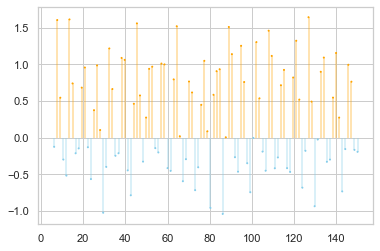

In [88]:
x = np.linspace(150, 2*np.pi, 100)
y = np.sin(x) + np.random.uniform(size=len(x)) - 0.2
 
# Create a color if the group is "B"
my_color=np.where(y>=0, 'orange', 'skyblue')
 
# The vertival plot is made using the hline function
# I load the seaborn library only to benefit the nice looking feature
import seaborn as sns
plt.vlines(x=x, ymin=0, ymax=y, color=my_color, alpha=0.4)
plt.scatter(x, y, color=my_color, s=1, alpha=1)

## Barchart

(0, 220)

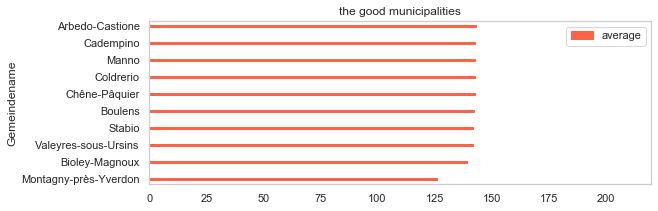

In [97]:
df_good.plot(x='Gemeindename', y='average', kind='barh',
            color='tomato', edgecolor='tomato', alpha=1, figsize=(9, 3),
            tick_label=50, title='the good municipalities',
            capstyle='round', facecolor='tomato', legend=True, fill='white',
            grid=False, width=0.1)

axes = plt.gca()
axes.set_xlim([0,220])

(0, 220)

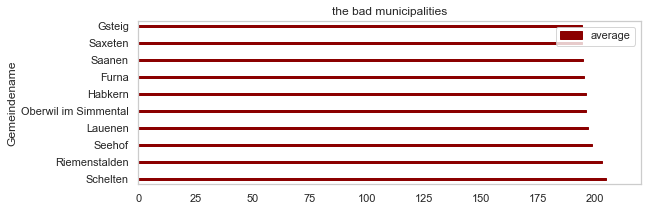

In [96]:
df_bad.plot(x='Gemeindename', y='average', kind='barh',
            color='darkred', edgecolor='darkred', alpha=1, figsize=(9, 3),
            tick_label=50, title='the bad municipalities',
            capstyle='round', facecolor='darkred', legend=True, fill='white',
            grid=False, width=0.1)

axes = plt.gca()
axes.set_xlim([0,220])
# axes.set_ylim([ymin,ymax])